In [ ]:
#IF WORKING WITH COLAB UNCOMMENT THE LINES BELOW


# from google.colab import drive
# from google.colab import files
# drive.mount("/content/gdrive")

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as k
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import RepeatVector
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras import regularizers
from keras.callbacks import LearningRateScheduler


In [16]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.cifar10.load_data() 

In [17]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] 

In [18]:
num_classes=10

train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

train_images=train_images.astype("float32")  
test_images=test_images.astype("float32")

train_images /= 255.0
test_images /= 255.0

In [19]:
#first convolution
model=Sequential()
model.add(Convolution2D(32, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


In [20]:
#2nd convolution layer
model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


In [21]:
#3rd convolution layer
model.add(Convolution2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


In [22]:
#flatten layer
model.add(Flatten())
model.add(Dense(32, activation='relu'))

In [23]:
n_timesteps=32
model.add(RepeatVector(n_timesteps))


In [24]:
#1st lstm layer
model.add(LSTM(128, return_sequences=True, input_shape=(n_timesteps,3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))



In [25]:
#2nd lstm layer
model.add(LSTM(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))

In [26]:
#output layer
model.add(Dense(num_classes,activation='softmax'))

#model compilation
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)       

In [27]:
from keras.callbacks import TensorBoard
tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1, write_graph=True,write_images=True)

In [28]:
#training
batch_size = 32
epochs=10

model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 800s 512ms/step - loss: 1.8789 - accuracy: 0.2780 - val_loss: 1.6383 - val_accuracy: 0.3774
Epoch 2/10
1563/1563 [==============================] - 740s 474ms/step - loss: 1.4797 - accuracy: 0.4546 - val_loss: 1.3419 - val_accuracy: 0.5040
Epoch 3/10
1563/1563 [==============================] - 865s 554ms/step - loss: 1.2844 - accuracy: 0.5366 - val_loss: 1.1775 - val_accuracy: 0.5762
Epoch 4/10
1563/1563 [==============================] - 956s 612ms/step - loss: 1.1690 - accuracy: 0.5836 - val_loss: 1.0499 - val_accuracy: 0.6330
Epoch 5/10
1563/1563 [==============================] - 903s 578ms/step - loss: 1.0938 - accuracy: 0.6161 - val_loss: 0.9757 - val_accuracy: 0.6583
Epoch 6/10
1563/1563 [==============================] - 788s 504ms/step - loss: 1.0359 - accuracy: 0.6387 - val_loss: 0.9723 - val_accuracy: 0.6681
Epoch 7/10
1563/1563 [==============================] - 813s 520ms/step - loss: 0.9789 - accuracy: 0.6607 - val_

In [29]:
scores = model.evaluate(test_images,test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 45s 143ms/step - loss: 0.8074 - accuracy: 0.7248
Test loss: 0.8073921203613281
Test accuracy: 0.7247999906539917


In [30]:
# get predictions on the test set
y_hat = model.predict(test_images)

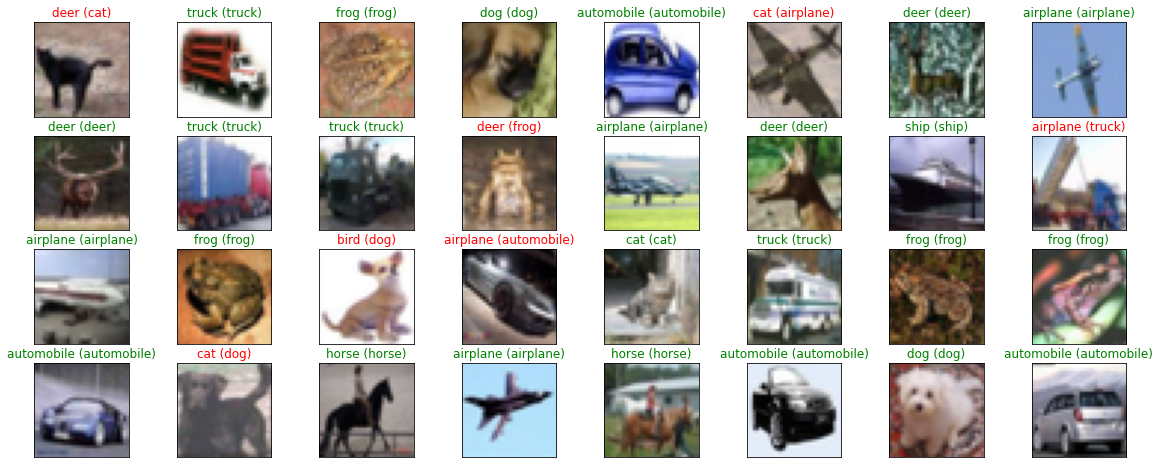

In [31]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(test_images.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(test_labels[idx])
    ax.set_title("{} ({})".format(class_names[pred_idx], class_names[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))